In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/Wang/Desktop/Python4DataAnalysis/Final/test7.csv')

In [3]:
city = ['San-Francisco','Boston','Palo-Alto','Chicago','New-York','Washington','Seattle','Atlanta','Houston','San-Diego']

In [4]:
city_dict = dict.fromkeys(city, 0)

In [5]:
city_dict

{'Atlanta': 0,
 'Boston': 0,
 'Chicago': 0,
 'Houston': 0,
 'New-York': 0,
 'Palo-Alto': 0,
 'San-Diego': 0,
 'San-Francisco': 0,
 'Seattle': 0,
 'Washington': 0}

In [7]:
for n in range(len(data)):
    job_city = data.loc[n,'jobCity']
    city_dict[job_city] += 1

In [8]:
city_dict

{'Atlanta': 160,
 'Boston': 692,
 'Chicago': 247,
 'Houston': 138,
 'New-York': 639,
 'Palo-Alto': 763,
 'San-Diego': 230,
 'San-Francisco': 711,
 'Seattle': 922,
 'Washington': 889}

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
city_dict_frame = pd.DataFrame(list(city_dict.items()))

In [11]:
city_dict_frame.columns = ['city','number_of_jobs']

In [12]:
city_dict_frame = city_dict_frame.sort_values('number_of_jobs',ascending=True)

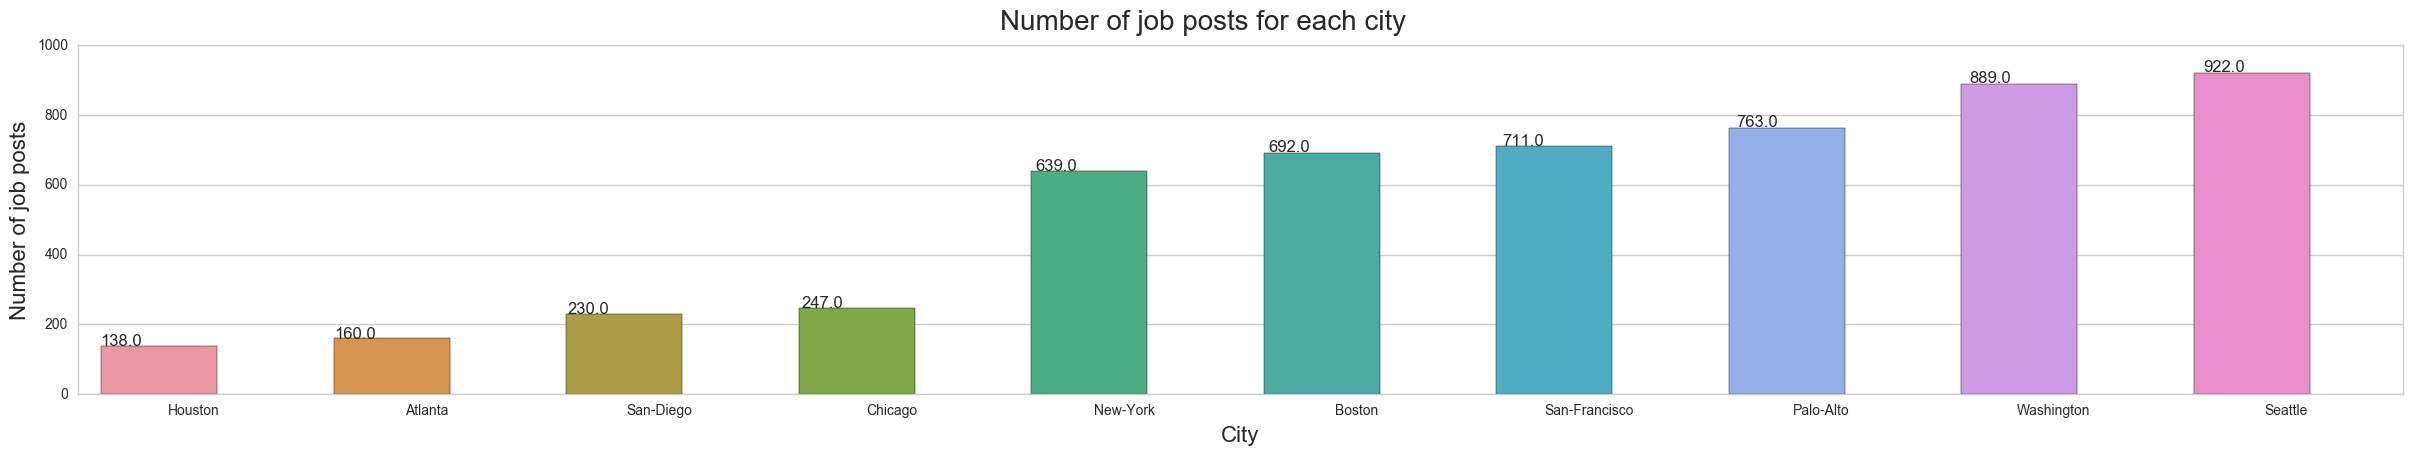

In [13]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 4.5)
fig = sns.barplot(x=city_dict_frame['city'], y=city_dict_frame['number_of_jobs'],data=city_dict_frame)
fig.figure.suptitle("Number of job posts for each city", fontsize = 20)
plt.ylabel('Number of job posts', fontsize=16)
plt.xlabel('City', fontsize=16)
for p,bar in zip(ax.patches,ax.patches):
    bar.set_width(0.5)
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [14]:
city_dict_frame

,city,number_of_jobs
6,Houston,138
1,Atlanta,160
0,San-Diego,230
2,Chicago,247
5,New-York,639
7,Boston,692
9,San-Francisco,711
4,Palo-Alto,763
8,Washington,889
3,Seattle,922


In [15]:
city_day_dict = dict.fromkeys(city, 0)

In [16]:
city

['San-Francisco',
 'Boston',
 'Palo-Alto',
 'Chicago',
 'New-York',
 'Washington',
 'Seattle',
 'Atlanta',
 'Houston',
 'San-Diego']

In [17]:
city_day_dict

{'Atlanta': 0,
 'Boston': 0,
 'Chicago': 0,
 'Houston': 0,
 'New-York': 0,
 'Palo-Alto': 0,
 'San-Diego': 0,
 'San-Francisco': 0,
 'Seattle': 0,
 'Washington': 0}

In [54]:
from datetime import datetime

In [48]:
datetime.strptime('2016-10-10', '%Y-%m-%d')

datetime.datetime(2016, 10, 10, 0, 0)

In [81]:
for m in city:
    date_time = []
    for n in range(len(data)):
        if data.loc[n,"jobCity"]==m:
            postdate_str = data.loc[n,'postDate'].split(':')[0][0:10]
            post_datetime = datetime.strptime(postdate_str, '%Y-%m-%d')
            date_time.append(post_datetime)
    maxdatetime = max(date_time)
    mindatetime = min(date_time)
    days = (maxdatetime - mindatetime).days
    city_day_dict[m] = days

In [82]:
city_day_dict

{'Atlanta': 202,
 'Boston': 363,
 'Chicago': 367,
 'Houston': 383,
 'New-York': 400,
 'Palo-Alto': 388,
 'San-Diego': 363,
 'San-Francisco': 397,
 'Seattle': 360,
 'Washington': 395}

In [61]:
import numpy as np
city_dict_frame['days'] = np.random.randn(len(city_dict_frame))

In [62]:
city_dict_frame

,city,number_of_jobs,days
1,Houston,138,-0.197797
5,Atlanta,160,-1.591247
3,San-Diego,230,2.098585
6,Chicago,247,0.472345
8,New-York,639,1.850922
7,Boston,692,0.321309
9,San-Francisco,711,-0.983364
4,Palo-Alto,763,1.423888
2,Washington,889,-0.869857
0,Seattle,922,-0.327336


In [63]:
for m in range(len(city_dict_frame)):
    city_dict_frame.loc[m,'days'] = city_day_dict[city_dict_frame.loc[m,'city']]

In [64]:
city_dict_frame

,city,number_of_jobs,days
1,Houston,138,383.0
5,Atlanta,160,202.0
3,San-Diego,230,363.0
6,Chicago,247,367.0
8,New-York,639,400.0
7,Boston,692,363.0
9,San-Francisco,711,397.0
4,Palo-Alto,763,388.0
2,Washington,889,395.0
0,Seattle,922,360.0


In [65]:
city_dict_frame['frequency'] = np.random.randn(len(city_dict_frame))

In [67]:
for m in range(len(city_dict_frame)):
    city_dict_frame.loc[m,'frequency'] ="%.2f" % (city_dict_frame.loc[m,'number_of_jobs'] / city_dict_frame.loc[m,'days'])

In [68]:
city_dict_frame

,city,number_of_jobs,days,frequency
1,Houston,138,383.0,0.36
5,Atlanta,160,202.0,0.79
3,San-Diego,230,363.0,0.63
6,Chicago,247,367.0,0.67
8,New-York,639,400.0,1.60
7,Boston,692,363.0,1.91
9,San-Francisco,711,397.0,1.79
4,Palo-Alto,763,388.0,1.97
2,Washington,889,395.0,2.25
0,Seattle,922,360.0,2.56


In [75]:
for n in range(len(city_dict_frame)):
    city_dict_frame.loc[n,'frequency'] = float(city_dict_frame.loc[n,'frequency'])

In [79]:
city_dict_frame = city_dict_frame.sort_values('frequency',ascending = True)

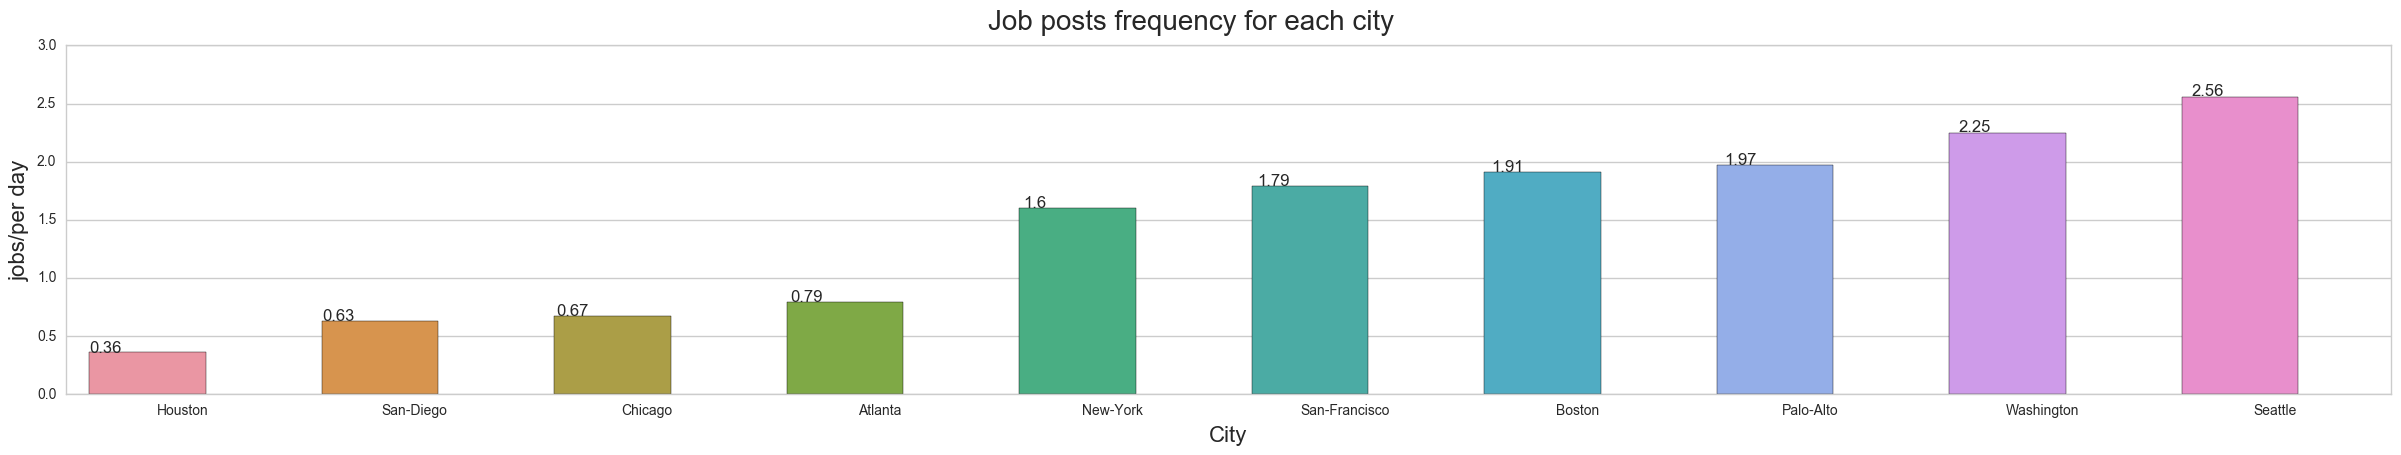

In [80]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(30, 4.5)
fig = sns.barplot(x=city_dict_frame['city'], y=city_dict_frame['frequency'],data=city_dict_frame)
fig.figure.suptitle("Job posts frequency for each city", fontsize = 20)
plt.ylabel('jobs/per day', fontsize=16)
plt.xlabel('City', fontsize=16)
for p,bar in zip(ax.patches,ax.patches):
    bar.set_width(0.5)
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()